### Import Necessary Module and Set Path 

In [1]:
import sqlite3 as lite
import os
import sys
import collections
sys.path.insert(0, '../../scripts/')
jupyter_directory = os.getcwd()

In [2]:
import analysis as an

## Run Cyclus Input file

In [11]:
! rm eu_future.sqlite
! cyclus -o eu_future.sqlite eu_future.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

### The output file should be named 
         
          eu_future.sqlite

In [3]:
# get sqlite cursor and simulation time data
cur = an.get_cursor('mox_storage.sqlite')
init_year, init_month, duration, timestep = an.get_timesteps(cur)

In [4]:
# get number of reactors and capacity timeseries
an.plot_power(cur)

/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


Romania has no values
Sink_Source_Inst has no values
Sink_Source_Inst has no values


In [5]:
inst_output_dict = an.commod_per_inst(cur, 'uox_waste')
for key in inst_output_dict:
    print(key)
    try:
        print(inst_output_dict[key]/1000)
    except:
        print(key + 'has none you silly')


agent_ids = an.get_agent_ids(cur, 'Sink')
french = an.facility_commodity_flux(cur, agent_ids, ['french_uox_waste'], False, False)
print('French SNF in Sink')
print(sum(french['french_uox_waste']))

print('French SNF total')
agent_ids = an.get_agent_ids(cur, 'Reactor')
french = an.facility_commodity_flux(cur, agent_ids, ['french_uox_waste'], True, False)
print(sum(french['french_uox_waste']))

print('French SNF to reprocessing')
agent_ids = an.get_agent_ids(cur, 'Separation')
french = an.facility_commodity_flux(cur, agent_ids, ['french_uox_waste'], False, False)
print(sum(french['french_uox_waste']))

Spain_government
10998.410000003329
Netherlands_government
632.7906000000144
Slovenia_government
898.6778000000262
Sweden_government
16579.33480000189
Bulgaria_government
3736.5261999996196
Lithuania_government
3103.7619999996673
Poland_government
2121.3401999998423
Italy_government
612.2716000000038
Romania_government
Romania_governmenthas none you silly
Czech_Republic_government
5116.732000000023
France_government
France_governmenthas none you silly
UK_government
15412.832200006811
Belgium_government
7797.613200002038
Hungary_government
3660.6595999995684
Germany_government
26466.891199984857
Slovakia_government
3223.0971999996464
Finland_government
6159.744000000728
Sink_Source_Inst
Sink_Source_Insthas none you silly
French SNF in Sink
37916.6662
French SNF total
77519.7272
French SNF to reprocessing
39603.061


In [6]:
# get tailings timeseries both cumulative and non-cumulative

agent_ids = an.get_agent_ids(cur, 'Sink')
tails_dict = an.facility_commodity_flux(cur, agent_ids, ['tails'], False)
tails_no_cum = an.facility_commodity_flux(cur, agent_ids, ['tails'], False, False)
an.double_axis_bar_line_plot(tails_no_cum, tails_dict, timestep, 'Years', 'Monthly Discharge Mass [MTHM]', 'Cumulative Mass [MTHM]',
                    'Tails Mass vs Time', 'tailings', init_year)

print('Total Tails in MTHM:')
print(max(tails_dict['tails']))

Total Tails in MTHM:
1131318.2558


In [7]:
# get total fuel mass vs time plot
fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox'])
an.stacked_bar_chart(fuel_dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'Total Fuel Mass vs Time',
                  'total_fuel',
                  init_year)

/home/dkadkf/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


In [8]:
# get spent fuel no_cum and cumulative plot
agent_ids = an.get_agent_ids(cur, 'Sink')
snf_dict_no_cum = an.facility_commodity_flux(cur, agent_ids, ['uox_waste','french_uox_waste'],
                                        False, False)
snf_dict = an.facility_commodity_flux(cur, agent_ids, ['uox_waste','french_uox_waste'],
                                        False, True)
dictionary = {}
dictionary['monthly_discharge'] = [x+y for x,y in zip(snf_dict_no_cum['uox_waste'], snf_dict_no_cum['french_uox_waste'])]
dict2 = {}
dict2['cum_mass'] = [x+y for x,y in zip(snf_dict['uox_waste'], snf_dict['french_uox_waste'])]

an.double_axis_bar_line_plot(dictionary,dict2, timestep, 'Years',  'Monthly Discharge Mass [MTHM]','Cumulative Mass [MTHM]',
                    'Spent Fuel Discharge vs Time', 'snf_discharge', init_year)


In [9]:
# Display important simulation results

# natural uranium demand
dictionary = collections.OrderedDict()
dictionary['natural_uranium'] = an.nat_u_timeseries(cur)
print('Total Natural U in MTHM:')
print(max(dictionary['natural_uranium']))

# get spent fuel timeseries
agent_ids = an.get_agent_ids(cur, 'Sink')
snf_dict = an.facility_commodity_flux(cur, agent_ids, ['uox_waste','french_uox_waste', 'mox_waste'],
                                        False)
# get spent fuel timeseries separated by region

agent_ids = an.get_agent_ids(cur, 'Sink')
comm_dict = an.commodity_flux_region(cur, agent_ids, ['uox_waste', 'french_uox_waste'], False)


print('Total UOX Waste in MTHM:')
print(max([x + y for x, y in zip(snf_dict['uox_waste'], snf_dict['french_uox_waste'])]))
print('Total MOX Waste in MTHM:')
print(max(snf_dict['mox_waste']))

# get fuel usage timeseries in stacked bar chart
fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox'])

print('Total UOX usage in MTHM:')
print(max(fuel_dict['uox']))
print('Total MOX usage in MTHM:')
print(max(fuel_dict['mox']))

# get tailings timeseries
agent_ids = an.get_agent_ids(cur, 'Sink')
tails_dict = an.facility_commodity_flux(cur, agent_ids, ['tails'], False)
print('Total Tailings in MTHM:')
print(max(tails_dict['tails']))

print('Total UOX usage in MTHM:')
print(max(fuel_dict['uox']))
print('Total MOX usage in MTHM:')
print(max(fuel_dict['mox']))

# get tailings timeseries
agent_ids = an.get_agent_ids(cur, 'Sink')
tails_dict = an.facility_commodity_flux(cur, agent_ids, ['tails'], False)
print('Total Tailings in MTHM:')
print(max(tails_dict['tails']))

print('Finished!')

Total Natural U in MTHM:
1324659.29449
Total UOX Waste in MTHM:
144437.3488
Total MOX Waste in MTHM:
4984.8616
Total UOX usage in MTHM:
187757.4372
Total MOX usage in MTHM:
5117.8052
Total Tailings in MTHM:
1131318.2558
Total UOX usage in MTHM:
187757.4372
Total MOX usage in MTHM:
5117.8052
Total Tailings in MTHM:
1131318.2558
Finished!


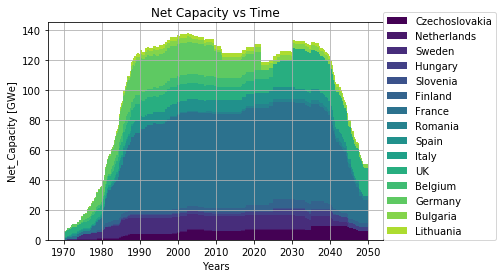

In [24]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

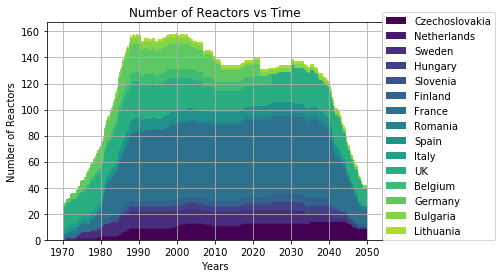

In [25]:
# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='num_plot.png')

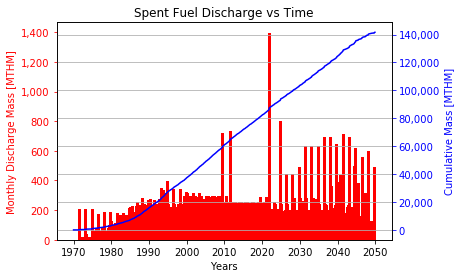

In [26]:
# Display natural U demand  vs Time
from IPython.display import Image
Image(filename='cum_mass_snf_discharge.png')

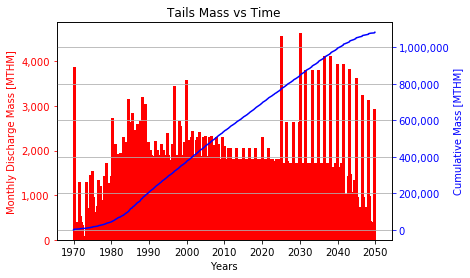

In [27]:
# Display spent fuel vs Time
from IPython.display import Image
Image(filename='tails_tailings.png')

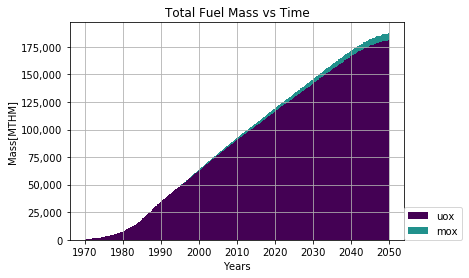

In [28]:
# Display total fuel usage  vs Time
from IPython.display import Image
Image(filename='total_fuel.png')